<a href="https://colab.research.google.com/github/balamurup/CEP_MultiArmedBandits/blob/main/MultiArmedBandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore then Exploit strategy 

# Single Episode

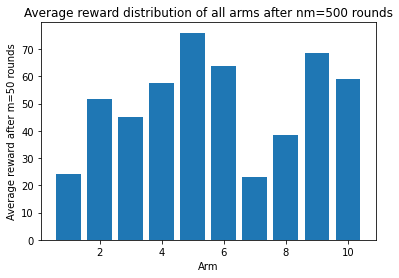

best arm: 4
Rounds: 1000  Overall avg reward: 60.324842621637025


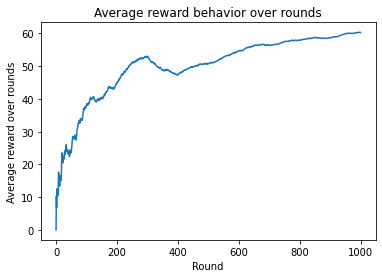

In [1]:
#import the required libraries 
import numpy as np
import matplotlib.pyplot as plt 

n = 10 #number of arms 
expected_payouts = np.asarray([10.,40.,50.,76.,90.,79.,0.,29.,85.,65.]) #actual mean payouts of arms, unknown to the users


k = 1000 #total rounds 

m = 50 #number of initial rounds to explore each arm 

avg_rewards_over_rounds = np.zeros(k)

np.random.seed(10000) #for reproducibility 

def get_reward(arm): #returns a normally distributed reward thresholded between [0,100]
    reward = np.random.normal(loc=expected_payouts[arm], scale=60)
    if reward<0:
        reward = 0.0
    elif reward > 100.0:
        reward = 100.0
    return reward 

def find_best_arm_single_episode():
    rewards_arms = np.zeros(n)
    round_idx = 0
    for arm in range(n):
        for idx in range(m):
            rewards_arms[arm] += get_reward(arm)
            avg_rewards_over_rounds[round_idx] = np.sum(rewards_arms)/(round_idx+1)
            round_idx += 1
    avg_rewards_arms = rewards_arms/(m) #compute average reward
    plt.bar(np.arange(1,n+1),avg_rewards_arms)    
    plt.xlabel("Arm")
    plt.ylabel("Average reward after m=%d rounds"%(m))
    plt.title("Average reward distribution of all arms after nm=%d rounds"%(n*m))
    plt.show()
    
    best_arm = np.argmax(avg_rewards_arms)
    
    print('best arm:',(best_arm))
    return best_arm, rewards_arms, avg_rewards_arms, avg_rewards_over_rounds

    
def play_multi_armed_bandit_single_episode():
    #explore phase 
    best_arm, rewards_arms, avg_rewards_arms, avg_rewards_over_rounds = find_best_arm_single_episode()
                                     
    #exploit phase 
    for round_idx in np.arange(n*m,k):
        rewards_arms[best_arm] += get_reward(best_arm)
        avg_rewards_over_rounds[round_idx] = np.sum(rewards_arms)/(round_idx+1)
    avg_rewards_arms[best_arm] = rewards_arms[best_arm]/(k-n*m)

    print('Rounds:',k,' Overall avg reward:',avg_rewards_over_rounds[-1])

    plt.plot(avg_rewards_over_rounds)    
    plt.xlabel("Round")
    plt.ylabel("Average reward over rounds")
    plt.title("Average reward behavior over rounds")
    plt.show()
    
    
    
if __name__ == '__main__':
  play_multi_armed_bandit_single_episode()                                     

$\large{\textbf{Exercise 1}}$: Try $m \in \{1,2,4,8,16,32\}$ and scale$\in\{10,20,30,40,50,60,70,80,90\}$ and run the code and tabulate the best arm and average reward obtained at the end of 1000 rounds. 

$\large{\textbf{Exercise 2}}$: Try the following expected payouts for the 10 arms and repeat the experiments in Exercise 1. 

i) [82.,84.,86.,88.,90.,92.,94.,96.,98.,100.]
ii) [86., 30., 0., 2., 79., 50., 90., 12., 95., 8.] 

# Multiple episodes

Explore them Exploit: Total time taken: 10.59840272800011 seconds!


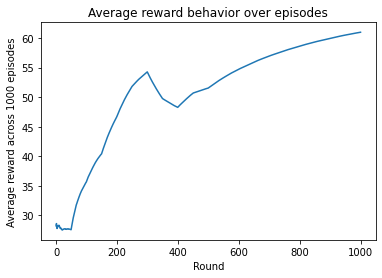

In [8]:
#import the required libraries 
import numpy as np
import matplotlib.pyplot as plt 
from timeit import default_timer as timer

n = 10 #number of arms 
expected_payouts = np.asarray([10.,40.,50.,76.,90.,79.,0.,29.,85.,65.])



np.random.seed(200) #for reproducibility 

def get_reward(arm):
    reward = np.random.normal(loc=expected_payouts[arm], scale=60)
    if reward<0:
        reward = 0.0
    elif reward > 100.0:
        reward = 100.0
    return reward 

def find_best_arm_explore_then_exploit(avg_rewards_over_rounds, m):
    rewards_arms = np.zeros(n)
    round_idx = 0
    for arm in range(n):
        for idx in range(m):
            rewards_arms[arm] += get_reward(arm)
            avg_rewards_over_rounds[round_idx] = np.sum(rewards_arms)/(round_idx+1)
            round_idx += 1
    avg_rewards_arms = rewards_arms/(m) #compute average reward
#     plt.bar(np.arange(1,n+1),avg_rewards_arms)    
#     plt.xlabel("Arm")
#     plt.ylabel("Average reward after m=%d rounds"%(m))
#     plt.title("Average reward distribution of all arms after nm=%d rounds"%(n*m))
#     plt.show()
    
    best_arm = np.argmax(avg_rewards_arms)
    
    #print('best arm:',(best_arm+1))
    return best_arm, rewards_arms, avg_rewards_arms, avg_rewards_over_rounds

    
def play_multi_armed_bandit_explore_then_exploit(num_rounds):
    k = num_rounds #total rounds 

    m = 50 #number of initial rounds to explore each arm 

    avg_rewards_over_rounds = np.zeros(k)

    #explore phase 
    best_arm, rewards_arms, avg_rewards_arms, avg_rewards_over_rounds = find_best_arm_explore_then_exploit(avg_rewards_over_rounds,m)
                                     
    #exploit phase 
    for round_idx in np.arange(n*m,k):
        rewards_arms[best_arm] += get_reward(best_arm)
        avg_rewards_over_rounds[round_idx] = np.sum(rewards_arms)/(round_idx+1)
    avg_rewards_arms[best_arm] = rewards_arms[best_arm]/(k-n*m)


    #print('Rounds:',k,' Overall avg reward:',avg_rewards_over_rounds[-1])
    return avg_rewards_over_rounds
    
    
    
def run_multi_armed_bandit_epsiodes_explore_then_exploit(num_episodes):
    assert num_episodes>0
    long_term_avg_reward = np.zeros(num_episodes)
    num_rounds_in_single_episode = 1000
    for episode in range(num_episodes):
        #print('################### episode: %d #################' %episode)
        avg_rewards_all_rounds_single_episode = play_multi_armed_bandit_explore_then_exploit(num_rounds_in_single_episode)   
        long_term_avg_reward = (episode*long_term_avg_reward + avg_rewards_all_rounds_single_episode)/(episode+1)
        #print('################### end of episode: %d #################' %episode)
    return long_term_avg_reward
    

if __name__ == '__main__':
    episodes = 1000

    start_time = timer()
    long_term_avg_reward_explore_then_exploit = run_multi_armed_bandit_epsiodes_explore_then_exploit(episodes)
    end_time = timer() 

    print('Explore them Exploit: Total time taken:',end_time-start_time, 'seconds!')
    plt.plot(long_term_avg_reward_explore_then_exploit)    
    plt.xlabel("Round")
    plt.ylabel("Average reward across %d episodes"%episodes)
    plt.title("Average reward behavior over episodes")
    plt.show()

$\large{\textbf{Exercise 3}}$: Try $m \in \{1,2,4,8,16,32\}$ and scale$\in\{10,20,30,40,50,60,70,80,90\}$ and run the code for multiple episodes of Explore-then-Exploit strategy and tabulate the average reward obtained at the end of 1000 episodes. 

# Combined Explore-Exploit strategy 

# Single episode

round: 0 arm: 8
round: 1 best arm: 8
round: 2 arm: 4
round: 3 best arm: 4
round: 4 arm: 8
round: 5 best arm: 4
round: 6 best arm: 8
round: 7 best arm: 8
round: 8 best arm: 4
round: 9 arm: 7
round: 10 best arm: 4
round: 11 arm: 0
round: 12 best arm: 4
round: 13 best arm: 4
round: 14 best arm: 4
round: 15 best arm: 4
round: 16 arm: 4
round: 17 arm: 3
round: 18 arm: 4
round: 19 best arm: 3
round: 20 best arm: 3
round: 21 arm: 6
round: 22 best arm: 4
round: 23 arm: 7
round: 24 arm: 6
round: 25 best arm: 4
round: 26 best arm: 4
round: 27 arm: 9
round: 28 best arm: 4
round: 29 best arm: 4
round: 30 best arm: 4
round: 31 best arm: 4
round: 32 arm: 3
round: 33 arm: 9
round: 34 best arm: 4
round: 35 best arm: 4
round: 36 best arm: 4
round: 37 best arm: 4
round: 38 best arm: 4
round: 39 best arm: 4
round: 40 arm: 0
round: 41 best arm: 4
round: 42 best arm: 4
round: 43 best arm: 4
round: 44 best arm: 4
round: 45 best arm: 4
round: 46 arm: 0
round: 47 best arm: 4
round: 48 best arm: 4
round: 49 be

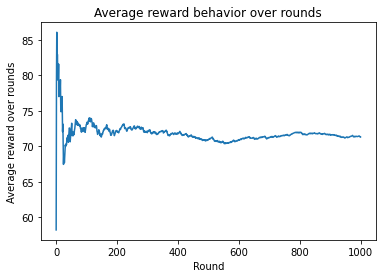

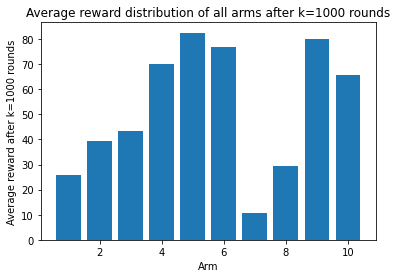

In [ ]:
#import the required libraries 
import numpy as np
import matplotlib.pyplot as plt 

n = 10 #number of arms 
expected_payouts = np.asarray([10.,40.,50.,76.,90.,79.,0.,29.,85.,65.])


k = 1000 #total rounds 

m = 50 #number of initial rounds to explore each arm 

avg_rewards_over_rounds = np.zeros(k)

np.random.seed(100) #for reproducibility

def get_reward(arm):
    reward = np.random.normal(loc=expected_payouts[arm], scale=30)
    if reward<0:
        reward = 0.0
    elif reward > 100.0:
        reward = 100.0
    return reward 

def find_best_arm_combined_explore_exploit_single_episode(avg_rewards_arms):
    best_arm = np.argmax(avg_rewards_arms)
    
    #print('best arm:',(best_arm+1))
    return best_arm

    
def play_multi_armed_bandit_combined_explore_exploit_single_episode():
    epsilon = 0.3
    avg_rewards_arms = np.zeros(n)
    freq_arms = np.zeros(n)
    for round_idx in range(k):
        if round_idx == 0: #first round 
            arm = np.random.randint(0, n)
            print('round:',round_idx,'arm:',arm)
            reward = get_reward(arm)
            avg_rewards_over_rounds[round_idx] = reward
            # we maintain a running average of rewards of each arm            
            avg_rewards_arms[arm] = (avg_rewards_arms[arm]*freq_arms[arm] + reward)/(freq_arms[arm]+1) 
            freq_arms[arm] += 1.
        else: #for other rounds 
            r = np.random.rand()
            best_arm = find_best_arm_combined_explore_exploit_single_episode(avg_rewards_arms)
            if r>epsilon: #use the best arm in the previous history
                #play the best arm so far 
                print('round:',round_idx,'best arm:',best_arm)
                reward = get_reward(best_arm)
                avg_rewards_over_rounds[round_idx] = (((round_idx)*avg_rewards_over_rounds[round_idx-1])+reward)/(round_idx+1)
                # we maintain a running average of rewards of each arm            
                avg_rewards_arms[best_arm] = (avg_rewards_arms[best_arm]*freq_arms[best_arm] + reward)/(freq_arms[best_arm]+1) 
                freq_arms[best_arm] += 1.
            else: #explore another arm other than the best arm so far
                arm = np.random.randint(0, n)
                print('round:',round_idx,'arm:',arm)
                while arm==best_arm:
                    arm = np.random.randint(0, n)
                reward = get_reward(arm)
                avg_rewards_over_rounds[round_idx] = (((round_idx)*avg_rewards_over_rounds[round_idx-1])+reward)/(round_idx+1)
                # we maintain a running average of rewards of each arm            
                avg_rewards_arms[arm] = (avg_rewards_arms[arm]*freq_arms[arm] + reward)/(freq_arms[arm]+1) 
                freq_arms[arm] += 1.
            #print(avg_rewards_arms)
                
    

    print('Rounds:',k,' Overall avg reward:',avg_rewards_over_rounds[-1])

    plt.plot(avg_rewards_over_rounds)    
    plt.xlabel("Round")
    plt.ylabel("Average reward over rounds")
    plt.title("Average reward behavior over rounds")
    plt.show()
    
    plt.bar(np.arange(1,n+1),avg_rewards_arms)    
    plt.xlabel("Arm")
    plt.ylabel("Average reward after k=%d rounds"%(k))
    plt.title("Average reward distribution of all arms after k=%d rounds"%(k))
    plt.show()

    
play_multi_armed_bandit_combined_explore_exploit_single_episode()                                     

$\large{\textbf{Exercise 4}}$: For the combined explore and exploit strategy, try $m \in \{1,2,4,8,16,32\}$ and scale$\in\{10,20,30,40,50,60,70,80,90\}$ and run the code and tabulate the best arm and average reward obtained at the end of 1000 rounds. 

$\large{\textbf{Exercise 5}}$: Try the following expected payouts for the 10 arms and repeat the experiments in Exercise 4. 

i) [82.,84.,86.,88.,90.,92.,94.,96.,98.,100.]
ii) [86., 30., 0., 2., 79., 50., 90., 12., 95., 8.] 

# Multiple Episodes

Combined explore and exploit: Time taken for 1000 episodes:  13.469703282000069  seconds!


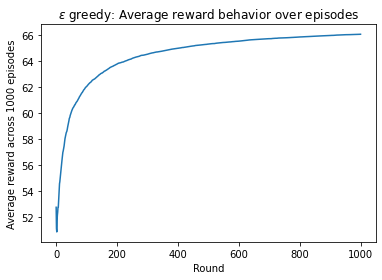

In [4]:
#import the required libraries 
import numpy as np
import matplotlib.pyplot as plt 
from timeit import default_timer as timer


n = 10 #number of arms 
expected_payouts = np.asarray([10.,40.,50.,76.,90.,79.,0.,29.,85.,65.])



np.random.seed(100) #for reproducibility

def get_reward(arm):
    reward = np.random.normal(loc=expected_payouts[arm], scale=60)
    if reward<0:
        reward = 0.0
    elif reward > 100.0:
        reward = 100.0
    return reward 

def find_best_arm_combined_explore_exploit_single_episode(avg_rewards_arms):
    best_arm = np.argmax(avg_rewards_arms)
    
    #print('best arm:',(best_arm+1))
    return best_arm

    
def play_multi_armed_bandit_combined_explore_exploit_single_episode(num_rounds):
    k = num_rounds #total rounds 

    avg_rewards_over_rounds = np.zeros(k)

    epsilon = 0.2

    avg_rewards_arms = np.zeros(n)
    freq_arms = np.zeros(n)
    for round_idx in range(k):
        if round_idx == 0: #first round 
            arm = np.random.randint(0, n)
            #print('round:',round_idx,'arm:',arm)
            reward = get_reward(arm)
            avg_rewards_over_rounds[round_idx] = reward
            # we maintain a running average of rewards of each arm            
            avg_rewards_arms[arm] = (avg_rewards_arms[arm]*freq_arms[arm] + reward)/(freq_arms[arm]+1) 
            freq_arms[arm] += 1.
        else: #for other rounds 
            r = np.random.rand()
            best_arm = find_best_arm_combined_explore_exploit_single_episode(avg_rewards_arms)
            if r>epsilon: #use the best arm in the previous history
                #play the best arm so far 
                #print('round:',round_idx,'best arm:',best_arm)
                reward = get_reward(best_arm)
                avg_rewards_over_rounds[round_idx] = (((round_idx)*avg_rewards_over_rounds[round_idx-1])+reward)/(round_idx+1)
                # we maintain a running average of rewards of each arm            
                avg_rewards_arms[best_arm] = (avg_rewards_arms[best_arm]*freq_arms[best_arm] + reward)/(freq_arms[best_arm]+1) 
                freq_arms[best_arm] += 1.
            else: #explore another arm other than the best arm so far
                arm = np.random.randint(0, n)
                #print('round:',round_idx,'arm:',arm)
                while arm==best_arm:
                    arm = np.random.randint(0, n)
                reward = get_reward(arm)
                avg_rewards_over_rounds[round_idx] = (((round_idx)*avg_rewards_over_rounds[round_idx-1])+reward)/(round_idx+1)
                # we maintain a running average of rewards of each arm            
                avg_rewards_arms[arm] = (avg_rewards_arms[arm]*freq_arms[arm] + reward)/(freq_arms[arm]+1) 
                freq_arms[arm] += 1.
            #print(avg_rewards_arms)
                
    

    #print('Rounds:',k,' Overall avg reward:',avg_rewards_over_rounds[-1])

    return avg_rewards_over_rounds
    
def run_multi_armed_bandit_epsiodes_combined_explore_exploit(num_episodes):
    assert num_episodes>0
    long_term_avg_reward = np.zeros(num_episodes)
    num_rounds_in_single_episode = 1000
    for episode in range(num_episodes):
        #print('################### episode: %d #################' %episode)
        avg_rewards_all_rounds_single_episode = play_multi_armed_bandit_combined_explore_exploit_single_episode(num_rounds_in_single_episode)   
        long_term_avg_reward = (episode*long_term_avg_reward + avg_rewards_all_rounds_single_episode)/(episode+1)
        #print('################### end of episode: %d #################' %episode)
    return long_term_avg_reward

if __name__ == '__main__':
    episodes = 1000
    start_time = timer()
    long_term_avg_reward_combined_explore_exploit = run_multi_armed_bandit_epsiodes_combined_explore_exploit(episodes)
    end_time = timer() 
    print('Combined explore and exploit: Time taken for 1000 episodes: ',end_time-start_time, ' seconds!')
    plt.plot(long_term_avg_reward_combined_explore_exploit)    
    plt.xlabel("Round")
    plt.ylabel("Average reward across %d episodes"%episodes)
    plt.title("$\epsilon$ greedy: Average reward behavior over episodes")
    plt.show()


$\large{\textbf{Exercise 6}}$: Try $m \in \{1,2,4,8,16,32\}$ and scale$\in\{10,20,30,40,50,60,70,80,90\}$ and run the code for multiple episodes of combined explore and exploit strategy strategy and tabulate the average reward obtained at the end of 1000 episodes.

# UCB

# Single episode

round: 0 arm: 0
round: 1 arm: 1
round: 2 arm: 2
round: 3 arm: 2
round: 4 arm: 3
round: 5 arm: 3
round: 6 arm: 3
round: 7 arm: 4
round: 8 arm: 5
round: 9 arm: 5
round: 10 arm: 6
round: 11 arm: 7
round: 12 arm: 8
round: 13 arm: 9
round: 14 arm: 9
round: 15 arm: 9
round: 16 arm: 1
round: 17 arm: 7
round: 18 arm: 5
round: 19 arm: 3
round: 20 arm: 8
round: 21 arm: 8
round: 22 arm: 7
round: 23 arm: 9
round: 24 arm: 2
round: 25 arm: 8
round: 26 arm: 8
round: 27 arm: 5
round: 28 arm: 8
round: 29 arm: 4
round: 30 arm: 4
round: 31 arm: 4
round: 32 arm: 5
round: 33 arm: 2
round: 34 arm: 3
round: 35 arm: 2
round: 36 arm: 3
round: 37 arm: 8
round: 38 arm: 3
round: 39 arm: 9
round: 40 arm: 7
round: 41 arm: 1
round: 42 arm: 5
round: 43 arm: 5
round: 44 arm: 4
round: 45 arm: 4
round: 46 arm: 2
round: 47 arm: 0
round: 48 arm: 6
round: 49 arm: 8
round: 50 arm: 8
round: 51 arm: 3
round: 52 arm: 5
round: 53 arm: 9
round: 54 arm: 3
round: 55 arm: 0
round: 56 arm: 8
round: 57 arm: 3
round: 58 arm: 3
round: 

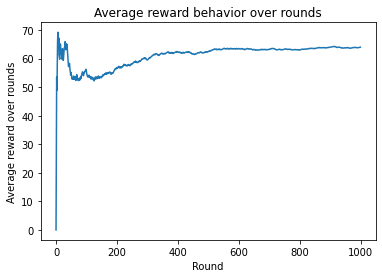

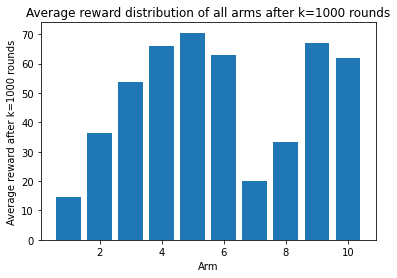

In [15]:
#import the required libraries 
import numpy as np
import matplotlib.pyplot as plt 

n = 10 #number of arms 
expected_payouts = np.asarray([10.,40.,50.,76.,90.,79.,0.,29.,85.,65.])


k = 1000 #total rounds 

m = 50 #number of initial rounds to explore each arm 

avg_rewards_over_rounds = np.zeros(k)

np.random.seed(100) #for reproducibility

def get_reward(arm):
    reward = np.random.normal(loc=expected_payouts[arm], scale=60)
    if reward<0:
        reward = 0.0
    elif reward > 100.0:
        reward = 100.0
    return reward 

def find_best_arm_UCB_single_episode(avg_rewards_arms, freq_arms, k, c):
    selection_scores_arms = avg_rewards_arms + c*np.sqrt(np.log(k)/(freq_arms+1))
    best_arm = np.argmax(selection_scores_arms)
    
    #print('best arm:',(best_arm+1))
    return best_arm

    
def play_multi_armed_bandit_UCB_single_episode():
    c = 80
    avg_rewards_arms = np.zeros(n)
    freq_arms = np.zeros(n)
    for round_idx in range(k):
        best_arm = find_best_arm_UCB_single_episode(avg_rewards_arms, freq_arms, k, c)
        print('round:',round_idx,'arm:',best_arm)
        reward = get_reward(best_arm)
        avg_rewards_over_rounds[round_idx] = (((round_idx)*avg_rewards_over_rounds[round_idx-1])+reward)/(round_idx+1)
        avg_rewards_arms[best_arm] = avg_rewards_arms[best_arm] + (reward-avg_rewards_arms[best_arm])/(freq_arms[best_arm]+1)
        freq_arms[best_arm] += 1.

    print('Rounds:',k,' Overall avg reward:',avg_rewards_over_rounds[-1])

    plt.plot(avg_rewards_over_rounds)    
    plt.xlabel("Round")
    plt.ylabel("Average reward over rounds")
    plt.title("Average reward behavior over rounds")
    plt.show()
    
    plt.bar(np.arange(1,n+1),avg_rewards_arms)    
    plt.xlabel("Arm")
    plt.ylabel("Average reward after k=%d rounds"%(k))
    plt.title("Average reward distribution of all arms after k=%d rounds"%(k))
    plt.show()

if __name__ == '__main__':  
  play_multi_armed_bandit_UCB_single_episode()                                     

$\large{\textbf{Exercise 7}}$: For the UCB strategy, try $m \in \{1,2,4,8,16,32\}$ and scale$\in\{10,20,30,40,50,60,70,80,90\}$ and  $c \in \{5,10,20,30,40,50,60,70,80,90,100,200\}$ and run the code and tabulate the best arm and average reward obtained at the end of 1000 rounds.

$\large{\textbf{Exercise 8}}$: Try the following expected payouts for the 10 arms and repeat the experiments in Exercise 6. 

i) [82.,84.,86.,88.,90.,92.,94.,96.,98.,100.]
ii) [86., 30., 0., 2., 79., 50., 90., 12., 95., 8.] 

# Multiple Episodes

UCB: Time taken for 1000 episodes:  22.315247225999883  seconds!


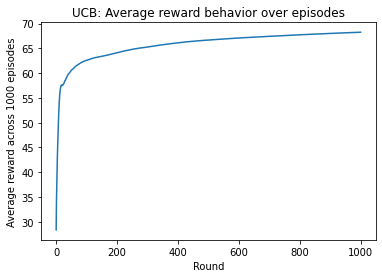

In [18]:
#import the required libraries 
import numpy as np
import matplotlib.pyplot as plt 

n = 10 #number of arms 
expected_payouts = np.asarray([10.,40.,50.,76.,90.,79.,0.,29.,85.,65.])


np.random.seed(100) #for reproducibility

def get_reward(arm):
    reward = np.random.normal(loc=expected_payouts[arm], scale=60)
    if reward<0:
        reward = 0.0
    elif reward > 100.0:
        reward = 100.0
    return reward 

def find_best_arm_UCB_single_episode(avg_rewards_arms, freq_arms, k, c):
    selection_scores_arms = avg_rewards_arms + c*np.sqrt(np.log(k)/(freq_arms+1))
    best_arm = np.argmax(selection_scores_arms)
    
    #print('best arm:',(best_arm+1))
    return best_arm

    
def play_multi_armed_bandit_UCB_single_episode(num_rounds):
    k = num_rounds #total rounds 

    avg_rewards_over_rounds = np.zeros(k)
    
    c = 50
    avg_rewards_arms = np.zeros(n)
    freq_arms = np.zeros(n)
    for round_idx in range(k):
        best_arm = find_best_arm_UCB_single_episode(avg_rewards_arms, freq_arms, k, c)
        #print('round:',round_idx,'arm:',best_arm)
        reward = get_reward(best_arm)
        avg_rewards_over_rounds[round_idx] = (((round_idx)*avg_rewards_over_rounds[round_idx-1])+reward)/(round_idx+1)
        avg_rewards_arms[best_arm] = avg_rewards_arms[best_arm] + (reward-avg_rewards_arms[best_arm])/(freq_arms[best_arm]+1)
        freq_arms[best_arm] += 1.

    #print('Rounds:',k,' Overall avg reward:',avg_rewards_over_rounds[-1])
    return avg_rewards_over_rounds

def run_multi_armed_bandit_epsiodes_UCB(num_episodes):
    assert num_episodes>0
    long_term_avg_reward = np.zeros(num_episodes)
    num_rounds_in_single_episode = 1000
    for episode in range(num_episodes):
        #print('################### episode: %d #################' %episode)
        avg_rewards_all_rounds_single_episode = play_multi_armed_bandit_UCB_single_episode(num_rounds_in_single_episode)   
        long_term_avg_reward = (episode*long_term_avg_reward + avg_rewards_all_rounds_single_episode)/(episode+1)
        #print('################### end of episode: %d #################' %episode)
    return long_term_avg_reward


if __name__ == '__main__':
    episodes = 1000
    start_time = timer()
    long_term_avg_reward_UCB = run_multi_armed_bandit_epsiodes_UCB(episodes)
    end_time = timer() 
    print('UCB: Time taken for 1000 episodes: ',end_time-start_time, ' seconds!')
    plt.plot(long_term_avg_reward_UCB)    
    plt.xlabel("Round")
    plt.ylabel("Average reward across %d episodes"%episodes)
    plt.title("UCB: Average reward behavior over episodes")
    plt.show()                                    

$\large{\textbf{Exercise 9}}$: For the UCB strategy, try $m \in \{1,2,4,8,16,32\}$ and scale$\in\{10,20,30,40,50,60,70,80,90\}$ and  $c \in \{5,10,20,30,40,50,60,70,80,90,100,200\}$ and run the code and tabulate average reward obtained at the end of 1000 episodes.

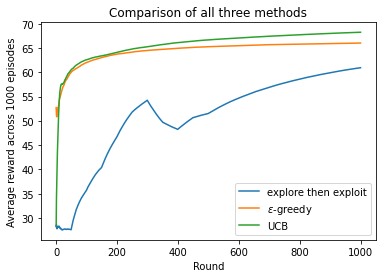

In [19]:
#plot all three methods to compare 

plt.plot(long_term_avg_reward_explore_then_exploit)
plt.plot(long_term_avg_reward_combined_explore_exploit)
plt.plot(long_term_avg_reward_UCB)    
plt.xlabel("Round")
plt.ylabel("Average reward across %d episodes"%episodes)
plt.title("Comparison of all three methods")
plt.legend(["explore then exploit", "$\epsilon$-greedy", "UCB"], loc ="lower right")
plt.show()                                    